# Anvil on Coiled Demo

In [1]:
import coiled

cluster = coiled.Cluster(
    name="nyc-analysis",
    software="coiled-examples/dask-dataframes",
    n_workers=25,
    worker_memory="16GiB",
    worker_cpu=4,
    scheduler_options={"idle_timeout": "1 hour"},
)

Output()

In [2]:
from distributed import Client

client = Client(cluster)
client

<Client: 'tls://10.4.15.106:8786' processes=18 threads=72, memory=278.81 GiB>

In [3]:
import dask.dataframe as dd

In [4]:
# read in Parquet data for February 2020 (repartitioned to 100MB file)
ddf = dd.read_parquet(
    "s3://coiled-datasets/dask-book/nyc-tlc/2011-2021-raw/",
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [5]:
# drop rows with wrong dates
ddf = ddf.loc[ddf.tpep_pickup_datetime.dt.year.isin(range(2011, 2022))]

In [6]:
count_per_year = (
    ddf.groupby(ddf.tpep_pickup_datetime.dt.year).trip_distance.count().compute()
)

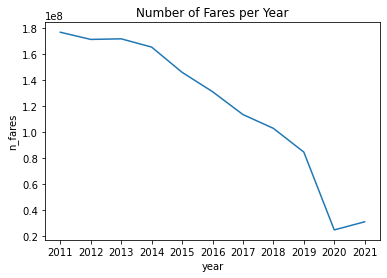

In [7]:
count_per_year.plot(
    xticks=range(2011, 2021 + 1),
    title="Number of Fares per Year",
    xlabel="year",
    ylabel="n_fares",
);

In [8]:
# get mean tip per year
tip_per_year = ddf.groupby(ddf.tpep_pickup_datetime.dt.year).tip_amount.mean().compute()

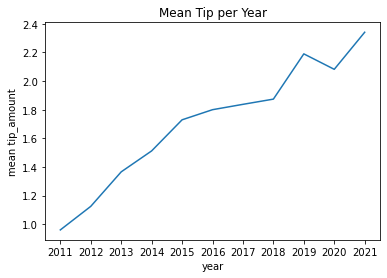

In [9]:
tip_per_year.plot(
    xticks=range(2011, 2021 + 1),
    title="Mean Tip per Year",
    xlabel="year",
    ylabel="mean tip_amount",
);